<a href="https://colab.research.google.com/github/beckachuu/INT3401_1/blob/logistic-regression/logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
dataset = datasets.load_iris()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
dataset['data'].shape
# d = 4

(150, 4)

In [ ]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Bài toán: $$x\in\mathbb R^4, y\in\{0,1,2\}$$

In [ ]:
model = LogisticRegression(max_iter=10000)
X = dataset['data']
y = dataset['target']
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.3)
model.fit(xtr, ytr)

LogisticRegression(max_iter=10000)

In [ ]:
ypred = model.predict(xte)

In [ ]:
ypred

array([2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1,
       2])

In [ ]:
yte

array([2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1,
       2])

In [ ]:
print(classification_report(yte, ypred, target_names=dataset['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# 5-fold cross validation
ypred = cross_val_predict(model, X, y, cv=10)

In [ ]:
print(classification_report(y, ypred, target_names=dataset['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
ypred = cross_val_predict(model, X, y, cv=50)
print(classification_report(y, ypred, target_names=dataset['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
model = DecisionTreeClassifier()
X = dataset['data']
y = dataset['target']
ypred = cross_val_predict(model, X, y, cv=10)
print(classification_report(y, ypred, target_names=dataset['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
model = RandomForestClassifier(n_estimators=200)
X = dataset['data']
y = dataset['target']
ypred = cross_val_predict(model, X, y, cv=10)
print(classification_report(y, ypred, target_names=dataset['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
model = LogisticRegression(max_iter=10000)
X = dataset['data']
y = dataset['target']
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.3)
model.fit(xtr, ytr)

LogisticRegression(max_iter=10000)

In [ ]:
model.predict(xte[10].reshape(1, -1))

array([0])

In [ ]:
xte[0]

array([4.9, 2.5, 4.5, 1.7])

In [ ]:
yte[10]

0

In [ ]:
dataset = datasets.load_digits()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
dataset['data'].shape

(1797, 64)

In [ ]:
dataset['images'].shape

(1797, 8, 8)

In [ ]:
X, y = dataset['data'], dataset['target']

In [ ]:
def show_images(X, y, ypred=None):
  nrows = len(y) // 6 + (len(y) % 6 > 0)
  ncols = 6
  plt.subplots(nrows, ncols, figsize=(20, 10))
  for i in range(len(X)):
    img = X[i].reshape(8, 8)
    label = y[i]
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(img, cmap='gray')
    if ypred is None:
      plt.title(f'label={label}')
    else:
      plt.title(f'label={label} ypred={ypred[i]}')
  plt.show()

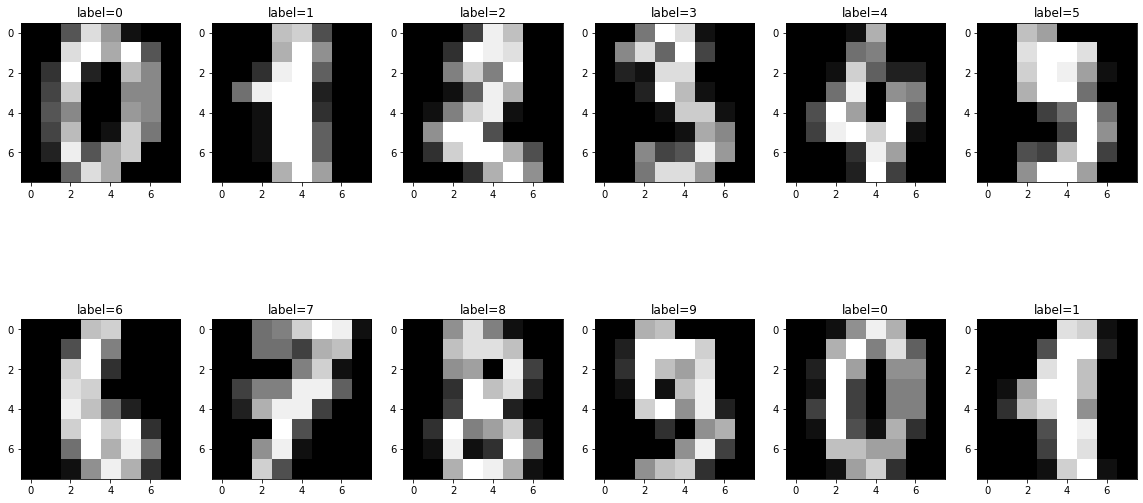

In [ ]:
show_images(X[:12], y[:12])

In [ ]:
model = LogisticRegression(max_iter=10000)
ypred = cross_val_predict(model, X, y, cv=10)

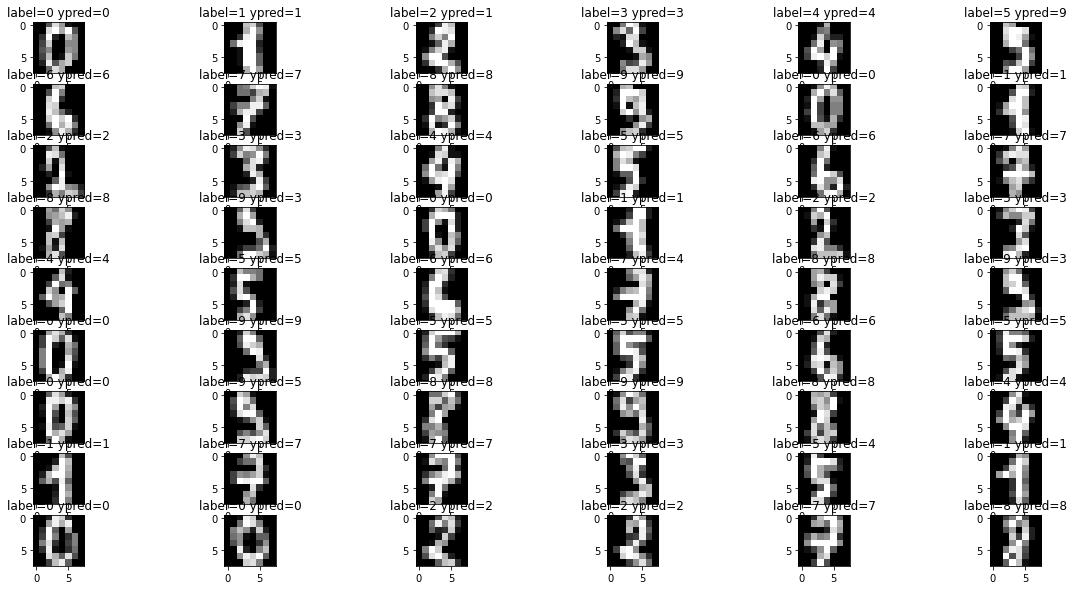

In [ ]:
show_images(X[:54], y[:54], ypred[:54])

In [ ]:
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       178
           1       0.89      0.90      0.90       182
           2       0.97      0.97      0.97       177
           3       0.96      0.91      0.94       183
           4       0.95      0.93      0.94       181
           5       0.93      0.92      0.93       182
           6       0.93      0.97      0.95       181
           7       0.97      0.91      0.94       179
           8       0.88      0.87      0.87       174
           9       0.84      0.92      0.88       180

    accuracy                           0.93      1797
   macro avg       0.93      0.93      0.93      1797
weighted avg       0.93      0.93      0.93      1797



In [ ]:
def train_binary_logistics(X, y, n_epoch=20000, eps=1e-6, learning_rate=1e-2):
  ## return w, w0
  n, d = X.shape
  w, w0 = np.zeros(d), 0
  for epoch in range(n_epoch):
    ## decision score
    f = np.dot(X, w) + w0
    ## class 1 probability
    mu = 1. / (1+np.exp(-f))
    ## loss function
    ell = np.sum(-y * np.log(mu+eps) - (1-y) * np.log(1-mu+eps))

    ## gradients
    dell_dw = np.sum(np.reshape(mu - y, (n,-1))*X, axis=0)
    dell_dw0 = np.sum(mu - y)

    ## gradient descent updates
    w = w - learning_rate / ((epoch+1)**0.5) * dell_dw
    w0 = w0 - learning_rate / ((epoch+1)**0.5) * dell_dw0

    if epoch % (n_epoch // 10) == 0 or epoch == n_epoch-1:
      print(epoch, ell, dell_dw)
  
  return w, w0

def predict_binary_logistics(X, w, w0):
  n = X.shape[0]
  f = np.dot(X, w) + w0
  y = np.zeros(n, dtype=np.int32)
  y[f > 0] = 1
  return y

dataset = datasets.load_iris()
# dataset = datasets.load_digits()
X, y = dataset['data'], dataset['target']
y[y!=1] = 0

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.3)

w, w0 = train_binary_logistics(xtr, ytr, n_epoch=30000, learning_rate=1e-1)
ypred = predict_binary_logistics(xte, w, w0)
print(classification_report(yte, ypred))

0 72.78024395900425 [73.8  51.65 30.75 10.3 ]
3000 53.04330542314077 [ 1.01487892  0.08546682  0.62791275 -0.30261752]
6000 52.71240083023015 [-0.01331579  0.02482498  0.03534977 -0.0665584 ]
9000 52.69624387186295 [-0.00457313  0.01375407  0.01235767 -0.02196205]
12000 52.6922971595577 [-0.00105728  0.00796692  0.00490089 -0.00879583]
15000 52.690729091354456 [ 0.00012394  0.00519023  0.00210117 -0.00387578]
18000 52.68995083808744 [ 0.00050352  0.00367017  0.00093221 -0.00180419]
21000 52.68951938042661 [ 0.00059316  0.00274258  0.00040829 -0.00086088]
24000 52.68926401436081 [ 0.00057629  0.00212868  0.0001627  -0.0004075 ]
27000 52.68910594249156 [ 5.23057357e-04  1.69732082e-03  4.50175324e-05 -1.81632706e-04]
29999 52.68900475404304 [ 4.61175596e-04  1.38056149e-03 -1.11384733e-05 -6.68843695e-05]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.67      0.55      0.60        11

    accuracy         

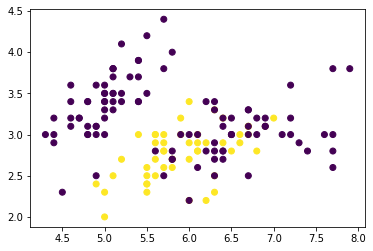

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
def train_multiclass_logistics(X, y, n_epoch=1, eps=1e-6, learning_rate=1e-2):
  n, d = X.shape[:2]
  C = len(np.unique(y))
  W, W0 = np.zeros((d, C)), np.zeros((1, C))

  for epoch in range(n_epoch):
    ## decision score: n x C
    f = np.dot(X, W) + W0

    ## mu = softmax(f)
    exp_f = np.exp( f - np.max(f, axis=1).reshape((n,1)) )
    mu = exp_f / np.sum(exp_f, axis=1).reshape((-1,1))

    ## loss function
    ell = np.sum(-np.log(mu[range(n), y]+eps))

    ## gradient
    coeff = mu.copy()
    coeff[range(n), y] -= 1
    dell_dW = np.dot(X.T, coeff) ## d x C
    dell_dW0 = np.sum(coeff, axis=0).reshape((1, C))

    ## updates
    W  =  W - learning_rate / ((epoch+1)**0.5) * dell_dW
    W0 = W0 - learning_rate / ((epoch+1)**0.5) * dell_dW0

    if epoch % (n_epoch // 10) == 0 or epoch == n_epoch-1:
      print(f"{epoch}, {ell:.2f}, {np.sum(np.abs(dell_dW)):.4f}, {np.sum(np.abs(dell_dW0)):.4f}")
      # print(W, W0)

  return W, W0

def predict_multiclass_logistics(X, W, W0):
  n = X.shape[0]
  f = np.dot(X, W) + W0
  y = np.argmax(f, axis=1)
  return y


# dataset = datasets.load_iris()
dataset = datasets.load_digits()
X, y = dataset['data'], dataset['target']

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.3)
W, W0 = train_multiclass_logistics(xtr, ytr, n_epoch=50000, learning_rate=1e-1)
ypred = predict_multiclass_logistics(xte, W, W0)
print(classification_report(yte, ypred))

0, 2894.34, 156352.8000, 37.6000
5000, 128.18, 5467.0315, 17.4125
10000, 0.04, 2.5020, 0.0037
15000, 0.01, 0.5950, 0.0009
20000, 0.00, 0.3698, 0.0006
25000, 0.00, 0.2778, 0.0004
30000, 0.00, 0.2270, 0.0003
35000, 0.00, 0.1944, 0.0003
40000, 0.00, 0.1715, 0.0003
45000, 0.00, 0.1545, 0.0002
49999, 0.00, 0.1413, 0.0002
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.93      0.95        54
           2       1.00      0.98      0.99        50
           3       0.94      0.95      0.94        61
           4       0.94      1.00      0.97        49
           5       0.93      0.96      0.95        55
           6       1.00      0.96      0.98        52
           7       1.00      0.96      0.98        49
           8       0.89      0.96      0.92        51
           9       0.94      0.91      0.92        66

    accuracy                           0.96       540
   macro avg       0.96      0.9

In [ ]:
print(confusion_matrix(yte, ypred))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  1  0  0  0  3  0]
 [ 0  0 49  1  0  0  0  0  0  0]
 [ 0  0  0 58  0  2  0  0  0  1]
 [ 0  0  0  0 49  0  0  0  0  0]
 [ 0  0  0  1  0 53  0  0  0  1]
 [ 0  1  0  0  0  0 50  0  1  0]
 [ 0  0  0  0  0  0  0 47  0  2]
 [ 0  0  0  0  0  2  0  0 49  0]
 [ 0  0  0  2  2  0  0  0  2 60]]
